<a href="https://colab.research.google.com/github/nirlevin80/nirlevin/blob/main/FinalOlympics_EDA_project_Adi_Fleisher_and_Nir_Levin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


################################ Olympics EDA project Adi Fleisher and Nir Levin #######################

###########################################################################################

### **Preliminaries**

In [ ]:
import pandas as pd
import numpy as np
#from scipy.special import erf
import matplotlib.pyplot as plt
import seaborn as sns

### **Data inspection**

In [ ]:
pd.options.display.max_rows = 50
plt.figure(figsize=(6.4, 4.8)) #default figure size

<Figure size 460.8x345.6 with 0 Axes>

<Figure size 460.8x345.6 with 0 Axes>

In [ ]:
olympics_df =pd.read_csv('athlete_events.csv.zip')
print(olympics_df.shape)
olympics_df.columns
olympics_df.drop_duplicates(inplace =True)
print(olympics_df.shape)

(271116, 15)
(269731, 15)


In [ ]:
olympics_df.sample(2)
# Columns:
#ID: uniqe per participacts per olympic
# Name,    Sex: M/F,    Team:   name of the team,   NOC = National olympic committee, Year, Seasons, City, Sport, Event, Medal:Gold, Silver, Bronze , NA.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
49911,25720,"Richard Dean ""Ricky"" Davis",M,25.0,170.0,70.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,NaN
20528,10831,Jacques Berthe,M,NaN,NaN,NaN,France,FRA,1948 Summer,1948,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN


In [ ]:
##################################  Read noc_regios.csv that translates NOC to country ############################33333 
countries_df=pd.read_csv('noc_regions.csv')
countries_df.shape
### Drop unnecessary column "notes"
countries_df.drop('notes', axis = 1, inplace= True )
print(countries_df.shape ) 
countries_df.dropna(inplace= True)
print(countries_df.shape)       
countries_df.sample(5)

(230, 2)
(227, 2)


,NOC,region
180,SLE,Sierra Leone
13,AUT,Austria
127,MAW,Malawi
38,CGO,Republic of Congo
79,GER,Germany


In [ ]:
###############################################################################################################
#############################################  Add column for TeamCountry #####################################
################################## Merge countries_df to olympics_df based on NOC column ######################
############       Left merge because we dont care if a NOC is not present in the olympics_df  ################ 
############################################## and some Data Cleanup      #####################################
###############################################################################################################
merge_olympics_df= olympics_df.merge(countries_df, on ='NOC', how = 'left')  
### change column name for readability
merge_olympics_df.rename(columns = {'region': 'TeamCountry'}, inplace= True)
print(merge_olympics_df.shape,'\n', merge_olympics_df.drop_duplicates().shape)
###########no duplicates to drop #############
merge_olympics_df.sample(10)
###merge_olympics_df.info()

#############TeamCountry has some Nans - find which country is missing and add list ##########################
# olympics_df_full[olympics_df_full.TeamCountry.isna()].head()
merge_olympics_df[merge_olympics_df.TeamCountry.isna()]['Team']

team_na = merge_olympics_df[merge_olympics_df.TeamCountry.isna() ]['Team'].unique() 
print('\n',team_na)
for t_na in team_na:
     freq = merge_olympics_df[merge_olympics_df.TeamCountry.isna() & (merge_olympics_df.Team == t_na)].value_counts('ID').sum()
     print( t_na , freq )
print('~~'*10)
#Fix data for particpants from Singapore###
merge_olympics_df[merge_olympics_df.TeamCountry.isna() ]['Team'].count()
merge_olympics_df.loc[ merge_olympics_df.Team ==  'Singapore-1','Team'] = 'Singapore'
merge_olympics_df.loc[ merge_olympics_df.Team ==  'Singapore-2','Team'] = 'Singapore'
merge_olympics_df.loc[ merge_olympics_df.Team ==  'Singapore','TeamCountry'] = 'Singapore'
for t_na in team_na:
     freq = merge_olympics_df[merge_olympics_df.TeamCountry.isna() & (merge_olympics_df.Team == t_na)].value_counts('ID').sum()
     print( t_na , freq )
print('~~'*10)
merge_olympics_df[ (merge_olympics_df.TeamCountry.isna()) &(merge_olympics_df.Team == 'Singapore')].head()

(269731, 16) 
 (269731, 16)

 ['Singapore' 'Refugee Olympic Athletes' 'June Climene' 'Unknown' 'Tuvalu'
 'Rika II' 'Singapore-2' 'Singapore-1']
Singapore 338
Refugee Olympic Athletes 12
June Climene 3
Unknown 2
Tuvalu 7
Rika II 4
Singapore-2 2
Singapore-1 2
~~~~~~~~~~~~~~~~~~~~
Singapore 0
Refugee Olympic Athletes 12
June Climene 3
Unknown 2
Tuvalu 7
Rika II 4
Singapore-2 0
Singapore-1 0
~~~~~~~~~~~~~~~~~~~~


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,TeamCountry


In [ ]:
###############################################################################################################
#############################  From DataSet: Name of Ciities where Olympic games were held ####################
###############################################################################################################
merge_olympics_df.City.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [ ]:
##############################################################################################################################
######## From Wikipaedia: copied table of with List of Cities, Country and Continent where Olympic games were held  ##########
########   We will merge this list to the data frame                                                                ##########
##############################################################################################################################

HostCountry= """
Athens	 Greece	Europe
Paris	 France	Europe
St. Louis[a]	 United States	North America
London[b]	 United Kingdom	Europe
Stockholm	 Sweden	Europe
Berlin	 Germany	Europe
Antwerpen[c]	 Belgium	Europe
Chamonix	 France	Europe
Paris	 France	Europe
St. Moritz	  Switzerland	Europe
Amsterdam	 Netherlands	Europe
Lake Placid	 United States	North America
Los Angeles	 United States	North America
Garmisch-Partenkirchen	 Germany	Europe
Berlin	 Germany	Europe
Sapporo	 Japan	Asia
Garmisch-Partenkirchen[d]	 Germany	Europe
Tokyo	 Japan	Asia
Helsinki[e]	 Finland	Asia
Cortina d'Ampezzo	 Italy	Europe
London	 United Kingdom	Europe
St. Moritz	  Switzerland	Europe
London	 United Kingdom	Europe
Oslo	 Norway	Europe
Helsinki	 Finland	Europe
Cortina d'Ampezzo	 Italy	Europe
Melbourne	 Australia	Oceania
Stockholm[f]	 Sweden	Europe
Squaw Valley	 United States	North America
Rome	 Italy	Europe
Innsbruck	 Austria	Europe
Tokyo	 Japan	Asia
Grenoble	 France	Europe
Mexico City	 Mexico	North America
Sapporo	 Japan	Asia
Munich	 West Germany	Europe
Innsbruck[g]	 Austria	Europe
Montreal	 Canada	North America
Lake Placid	 United States	North America
Moscow	 Soviet Union[h]	Europe
Sarajevo	 Yugoslavia	Europe
Los Angeles	 United States	North America
Calgary	 Canada	North America
Seoul	 South Korea	Asia
Albertville	 France	Europe
Barcelona	 Spain	Europe
Lillehammer	 Norway	Europe
Atlanta	 United States	North America
Nagano	 Japan	Asia
Sydney	 Australia	Oceania
Salt Lake City	 United States	North America
Athens	 Greece	Europe
Turin	 Italy	Europe
Beijing[i]	 China	Asia
Vancouver	 Canada	North America
London	 United Kingdom	Europe
Sochi	 Russia[h]	Europe
Rio de Janeiro	 Brazil	South America
Pyeongchang	 South Korea	Asia
Tokyo	 Japan	Asia
Beijing	 China	Asia
Paris	 France	Europe
Milan–Cortina d'Ampezzo	 Italy	Europe
Los Angeles	 United States	North America
Brisbane	 Australia	Oceania
"""

In [ ]:
########################   import libraries for next step ###################################
#############################################################################################
from io import StringIO 
import re

In [ ]:
##########             Cleanup HostCountry list using regex and create DF from it  ##########
##############################################################################################
HostCountry_str = re.sub(r'\[[A-Za-z0-9]\]+','',HostCountry)
HostCountry_df= pd.read_csv(StringIO(HostCountry_str), header= None, sep = '\t', usecols = [0,1,2], names = [ 'City', 'Country', 'Continent'])
HostCountry_df.Country = HostCountry_df.Country.str.replace('\xa0', '')
HostCountry_df.drop_duplicates(inplace=True)

#Review and align  HostCountry_df with dataset up to 2016  
lst1 = list(olympics_df_full.HostCity.unique() )
lst1.sort()
lst2= list(HostCountry_df.City.unique())
lst2.sort()
#print('\n',len(lst1), set(lst1),'\n', len(lst2), set(lst2))
print('\n',list(set(lst1) - set(lst2)), '\n', list(set(lst2) -set(lst1)),'\n~~~~~~~~~~~~~~~~~' )

#drop future Olympics not in dataset
cities_to_drop = ['Brisbane', 'Pyeongchang',"Milan–Cortina d'Ampezzo"]
index_to_drop = HostCountry_df[HostCountry_df.City.isin(cities_to_drop)].index
HostCountry_df.drop(index_to_drop, inplace = True)
#print(HostCountry_df.shape)

#Helsinki appears twice, once belonging to Asia and once to Europe, align to Europe
HostCountry_df.loc[ HostCountry_df.City == 'Helsinki', 'Continent'] = 'Europe'
HostCountry_df.drop_duplicates(inplace=True)
HostCountry_df.shape
HostCountry_df.sample(3)



 [] 
 ["Milan–Cortina d'Ampezzo", 'Pyeongchang', 'Brisbane'] 
~~~~~~~~~~~~~~~~~


,City,Country,Continent
23,Oslo,Norway,Europe
52,Turin,Italy,Europe
32,Grenoble,France,Europe


In [ ]:
##############  Just a reminder of the columns we had in the merged DF 
print(f'merge_olympics_df shape: {merge_olympics_df.shape}\n~~~~~~~~~~\ncolumns: {merge_olympics_df.columns}\n')
# print('~'*20)
# merge_olympics_df.info()

merge_olympics_df shape: (269731, 16)
~~~~~~~~~~
columns: Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'TeamCountry'],
      dtype='object')



In [ ]:

from numpy.core.fromnumeric import sort
###################################  Create The olympics_df_full ########################################################
###########  Merge DF HostCountry_df to merge_olympics_df to get Country and Continent based on common City column #######
##########################################################################################################################
######   align City names: 
#########################
merge_olympics_df['City'].replace(['Athina', 'Roma','Torino', 'Moskva', 'Sankt Moritz'],['Athens','Rome','Turin','Moscow','St. Moritz'], inplace=True)

############ LEFT merge because we dont care if city is in HostCountry_df but not in merge_olympics_df
olympics_df_full= merge_olympics_df.merge(HostCountry_df, on =['City'], how = 'left')
olympics_df_full.shape
########### Set Intuitive column names 
olympics_df_full.rename(columns = {'Country': 'HostCountry', 'Continent':'HostContinent', 'City': 'HostCity'}, inplace=True)
olympics_df_full['HostCountry'].replace('United States','USA', inplace=True)

print("olympics_df:        ",olympics_df.shape, olympics_df.drop_duplicates().shape,'\n', olympics_df.columns,'\n')
print("merge_olympics_df:   ",merge_olympics_df.shape, merge_olympics_df.drop_duplicates().shape, '\n',merge_olympics_df.columns,'\n')
print("olympics_df_full:    ", olympics_df_full.shape, olympics_df_full.drop_duplicates().shape, '\n',olympics_df_full.columns,'\n')


olympics_df:         (269731, 15) (269731, 15) 
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object') 

merge_olympics_df:    (269731, 16) (269731, 16) 
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'TeamCountry'],
      dtype='object') 

olympics_df_full:     (269731, 18) (269731, 18) 
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'HostCity', 'Sport', 'Event', 'Medal', 'TeamCountry',
       'HostCountry', 'HostContinent'],
      dtype='object') 






https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

(269731, 2)
(906, 2)


Text(0.5, 1.0, 'Olympic Sports Contested in The Olympic Games')

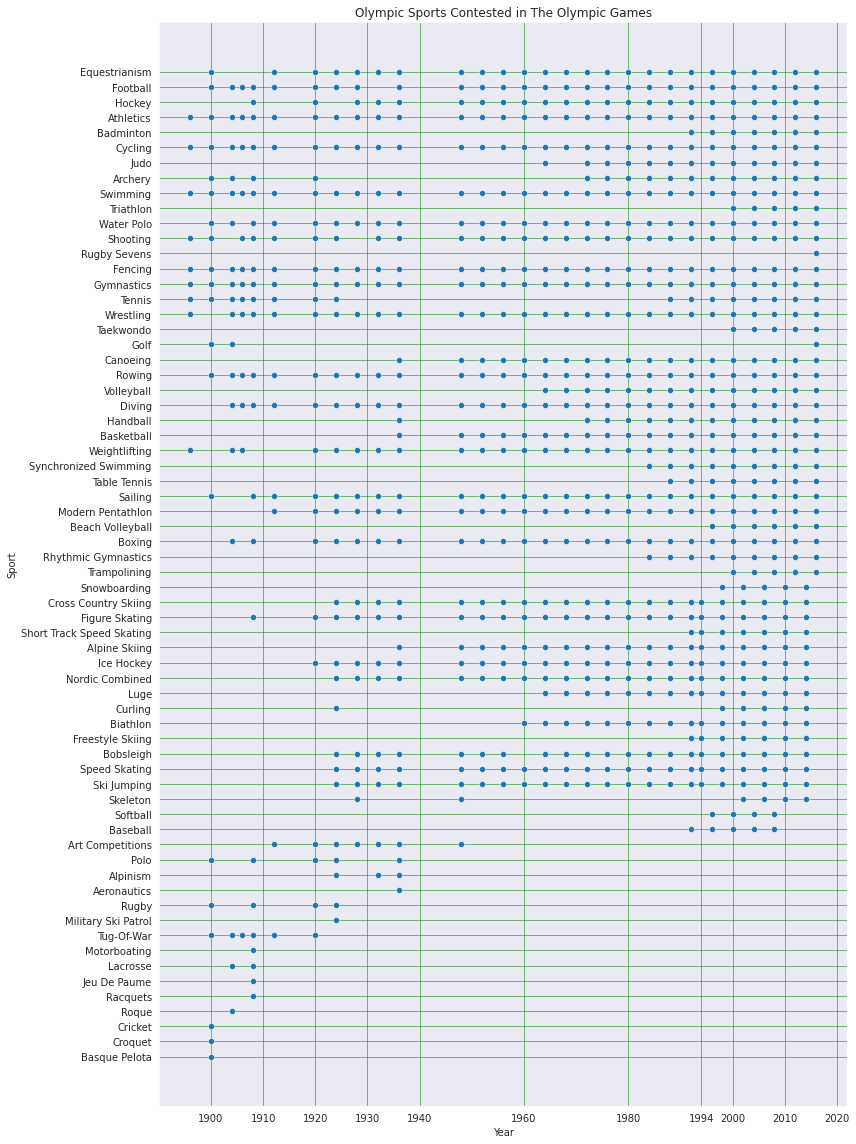

In [ ]:
##########################################################################################################################
###############                  What sports competitions were held at each olympic                              #########
##########################################################################################################################
sc2 = ['Year', 'Sport']
sports_df2 = olympics_df_full[sc2].sort_values(by='Year', ascending = False).reset_index(drop = True)
print(sports_df2.shape)
#now drop the duplicates from df2
sports_df2.drop_duplicates(inplace = True)
print(sports_df2.shape)

fig = plt.figure(figsize=(12,16))
sns.set_style("darkgrid")
g = sns.scatterplot(data =sports_df2, x= 'Year', y= 'Sport' ); # fix axis; shows new and old sports
plt.grid(color='g', linestyle='-', linewidth=0.5);
xtick_loc = [1900, 1910,1920, 1930,  1940, 1960, 1980, 1994, 2000, 2010, 2020]
g.set_xticks(xtick_loc);
g.set_title('Olympic Sports Contested in The Olympic Games' )


Check for correlation in the DF 
only obvious correlation is Height and Weight

In [ ]:
####################################  Data assessment section ####################################
# check the correlation between each of the numirical variables: as expected, the only correlation could be between Height and weight
# per each participants. As a rule of thumb, a correlation greater than 0.75 is considered to be a “strong” correlation between two variables.
olympics_df_full.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002861,-0.011080,-0.009177,0.011381
Age,-0.002861,1.000000,0.138277,0.212192,-0.092779
Height,-0.011080,0.138277,1.000000,0.796230,0.047615
Weight,-0.009177,0.212192,0.796230,1.000000,0.019236
Year,0.011381,-0.092779,0.047615,0.019236,1.000000


Assess Data Quality 

---


cutoff criteria 4 NaNs in a DF row 

In [ ]:
#################   NaN appear in Age, Weight, Height and Medal and some TeamCountry#############    
#################   For Age/Weight/Height analysis check extent of Nans ##########################
olympics_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 269730
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             269731 non-null  int64  
 1   Name           269731 non-null  object 
 2   Sex            269731 non-null  object 
 3   Age            260416 non-null  float64
 4   Height         210917 non-null  float64
 5   Weight         208204 non-null  float64
 6   Team           269731 non-null  object 
 7   NOC            269731 non-null  object 
 8   Games          269731 non-null  object 
 9   Year           269731 non-null  int64  
 10  Season         269731 non-null  object 
 11  HostCity       269731 non-null  object 
 12  Sport          269731 non-null  object 
 13  Event          269731 non-null  object 
 14  Medal          39772 non-null   object 
 15  TeamCountry    269703 non-null  object 
 16  HostCountry    269731 non-null  object 
 17  HostContinent  269731 non-nul

In [ ]:
olympics_df_full.isna().sum()

ID                    0
Name                  0
Sex                   0
Age                9315
Height            58814
Weight            61527
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
HostCity              0
Sport                 0
Event                 0
Medal            229959
TeamCountry          28
HostCountry           0
HostContinent         0
dtype: int64

<Figure size 1296x432 with 0 Axes>

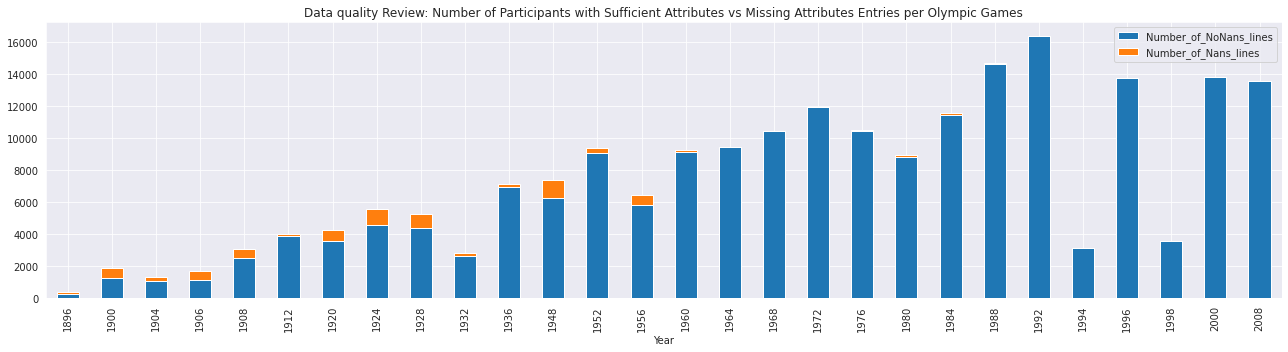

In [ ]:
############       Asses effect of discarding/igonring entries with cutoff of 4 NaNs  ############
#################   NaN appear for Age, Weight, Height and Medal and some TeamCountry#############    
##################################################################################################
#olympics_df_full.info()
olympics_df_nans = olympics_df_full[olympics_df_full.isnull().sum(axis=1)>3]   #(not age not height not weight and not medal)
testme_nans = olympics_df_nans.Year.value_counts(dropna = False).sort_index()

olympics_df_noNan = olympics_df_full[olympics_df_full.isnull().sum(axis=1)<4]
testme_full = olympics_df_noNan.Year.value_counts(dropna = False).sort_index()

fig = plt.figure(figsize=(18, 6))
#ax = fig.gca()
Temp_nans = olympics_df_nans.groupby('Year')['ID'].count().reset_index()
Temp_nans.rename(columns = {'ID':'Number_of_Nans_lines'}, inplace = True)
Temp_nonans = olympics_df_noNan.groupby('Year')['ID'].count().reset_index()
Temp_nonans.rename(columns = {'ID':'Number_of_NoNans_lines'}, inplace = True)
merged_Nan_NoNan = Temp_nonans.merge(Temp_nans, on='Year')
merged_Nan_NoNan.plot.bar(x='Year',stacked=True, title='Data quality Review: Number of Participants with Sufficient Attributes vs Missing Attributes Entries per Olympic Games');

In [ ]:
#olympics_df_noNan.info

In [ ]:
#olympics_df_noNan.tail(20)

In [ ]:
#olympics_df_noNan.info

Number of Olympic Games participants 

In [ ]:
olympics_df_full.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'HostCity', 'Sport', 'Event', 'Medal', 'TeamCountry',
       'HostCountry', 'HostContinent'],
      dtype='object')

In [ ]:
###############################  Creating a DF single entry per participant in each olympic game  [ID, Year, Season] #################
######################################################################################################################################
temp = olympics_df_noNan[['ID', 'Name','Year', 'Season', 'Sex','Age', 'Height', 'Weight', 'Medal','HostCity', 'Sport', 'Event',  'TeamCountry',
       'HostCountry', 'HostContinent']] 
temp.info
participant_noNan = temp.drop_duplicates(subset=['Year','Season', 'ID'], keep=False)
print(participant_noNan.shape,olympics_df_noNan.shape)
participant_noNan.sample(3)

(136429, 15) (262153, 18)


,ID,Name,Year,Season,Sex,Age,Height,Weight,Medal,HostCity,Sport,Event,TeamCountry,HostCountry,HostContinent
104912,53378,Joanna Maja Jakimiuk,1996,Summer,F,20.0,176.0,69.0,NaN,Atlanta,Fencing,"Fencing Women's epee, Individual",Poland,USA,North America
109555,55715,"Patricia Ann ""Pat"" Jones",1968,Summer,F,26.0,173.0,62.0,NaN,Mexico City,Athletics,Athletics Women's 80 metres Hurdles,UK,Mexico,North America
14460,7806,Edvns Johans Brda,1924,Summer,M,24.0,NaN,NaN,NaN,Paris,Football,Football Men's Football,Latvia,France,Europe


(136429, 15) (269731, 15)


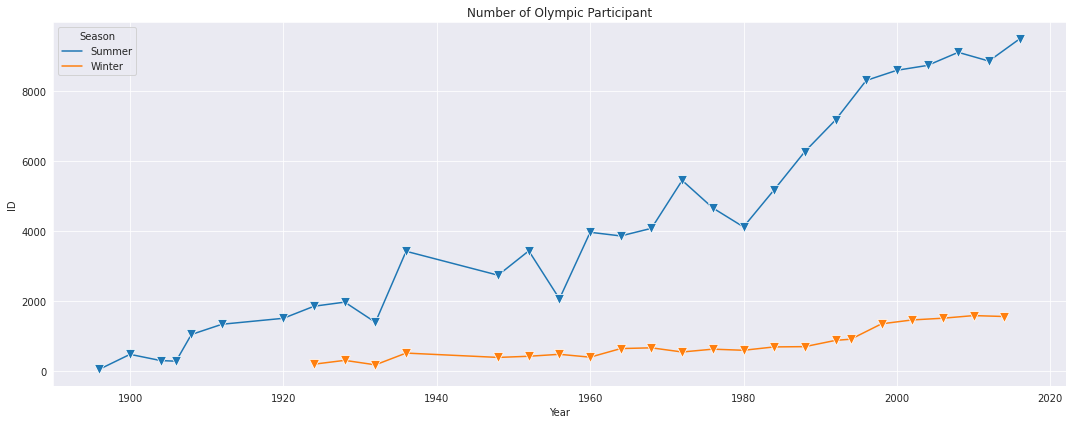

In [ ]:
plt.figure(figsize=(15, 6))
##################
olympics_df_season = participant_noNan.groupby(['Year', 'Season'])['ID'].count().reset_index()
olympics_df_season

g= sns.lineplot(data = olympics_df_season , x= 'Year', y= 'ID', hue= 'Season', marker = 'v', markersize=10).set(title='Number of Olympic Participant');
xtick_loc = [1900, 1910,1920, 1930,  1940, 1950, 1960, 1970, 1980, 1990,1994, 2000, 2010, 2020];
#g.set_xticks(xtick_loc);
print(participant_noNan.shape,olympics_df.shape )

In [ ]:

participant_noNan.corr()

,ID,Year,Age,Height,Weight
ID,1.000000,0.016351,-0.000713,0.001417,0.000422
Year,0.016351,1.000000,-0.065998,0.018226,-0.012920
Age,-0.000713,-0.065998,1.000000,0.066085,0.147642
Height,0.001417,0.018226,0.066085,1.000000,0.763124
Weight,0.000422,-0.012920,0.147642,0.763124,1.000000


In [ ]:
plt.figure(figsize=(15, 6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

No handles with labels found to put in legend.


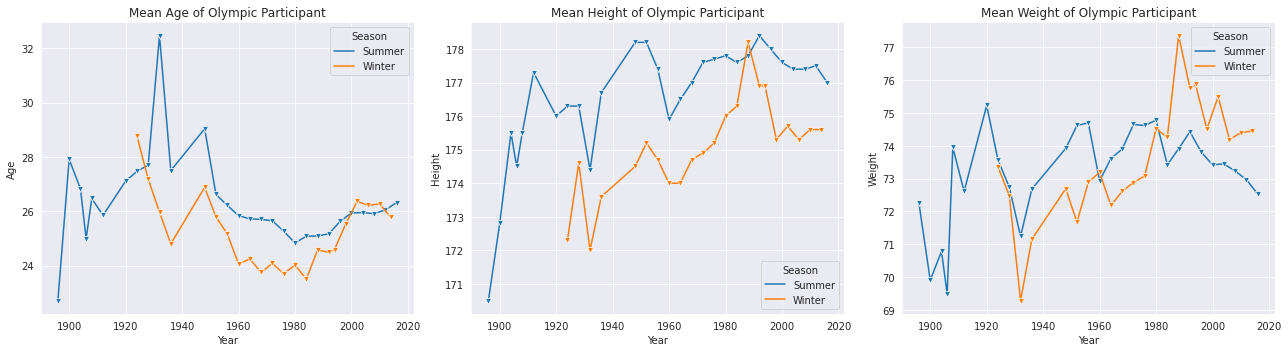

In [ ]:
###################################### Mean Age Height Weight of all contestants    ##########################
######################################################################################################################
plt.rcParams["figure.figsize"] = [18, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1,3)
plt.legend(loc='lower right')
mean_age = participant_noNan.groupby(['Season','Year'])['Age'].mean().round(2).reset_index()
sns.lineplot(data=mean_age , y= 'Age', x= 'Year', hue = 'Season', ax=axes[0], marker = 'v' ).set(title='Mean Age of Olympic Participant');
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~HEIGHT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_height = participant_noNan.groupby(['Season','Year'])['Height'].mean().round(1).reset_index()
sns.lineplot(data=mean_height , y= 'Height', x= 'Year', hue = 'Season', ax=axes[1], marker = 'v'  ).set(title='Mean Height of Olympic Participant');
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Weight~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mean_weight = participant_noNan.groupby(['Season','Year'])['Weight'].mean().round(2).reset_index()
sns.lineplot(data=mean_weight , y= 'Weight', x= 'Year', hue = 'Season', ax=axes[2], marker = 'v'  ).set(title='Mean Weight of Olympic Participant');


### Question number 1: Does global war's effect participants average age ?

In [ ]:
np.sort(participant_noNan.Year.unique())


array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

Inspect average Age of olypic games particpants over the years
Note: WW-2 effect - Medalists and All particpants

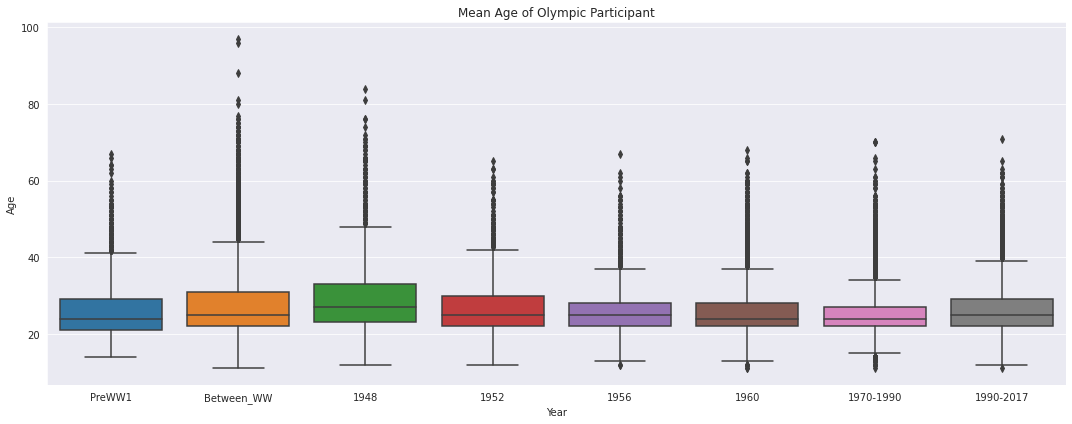

In [ ]:
#################Mean Age of Olympic particpant affected by WW-1 and WW-2
#######################################################################################3
#participant_noNan
plt.figure(figsize=(15, 6))
lbl = ['PreWW1','Between_WW' , '1948', '1952', '1956','1960', '1970-1990', '1990-2017']
years_era =  pd.cut(participant_noNan.Year, [1900,1919,1940,1950 ,1953,1959,1970,1990, 2017], labels=lbl ) #, labels=['19','Between_wars','Afte','Cold_war70s/80s','Last25years'])
# olympics_df_noNan_men= olympics_df_noNan.loc[olympics_df_noNan.Age=='M']
sns.boxplot(data=participant_noNan, y='Age', x=years_era,).set(title='Mean Age of Olympic Participant'); 
participant_noNan.Year.unique().sort()

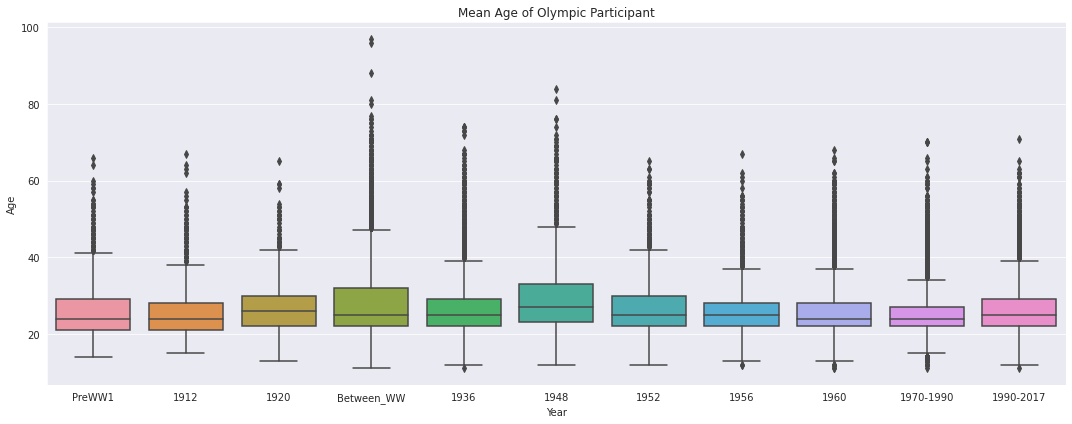

In [ ]:
#Adi : I dont think we need this
plt.figure(figsize=(15, 6))
lbl = ['PreWW1', '1912', '1920', 'Between_WW', '1936' , '1948', '1952', '1956','1960', '1970-1990', '1990-2017']
years_era =  pd.cut(participant_noNan.Year, [1900,1911,1913,1921,1935,1940,1950 ,1953,1959,1970,1990, 2017], labels=lbl )
sns.boxplot(data=participant_noNan, y='Age', x=years_era,).set(title='Mean Age of Olympic Participant'); 


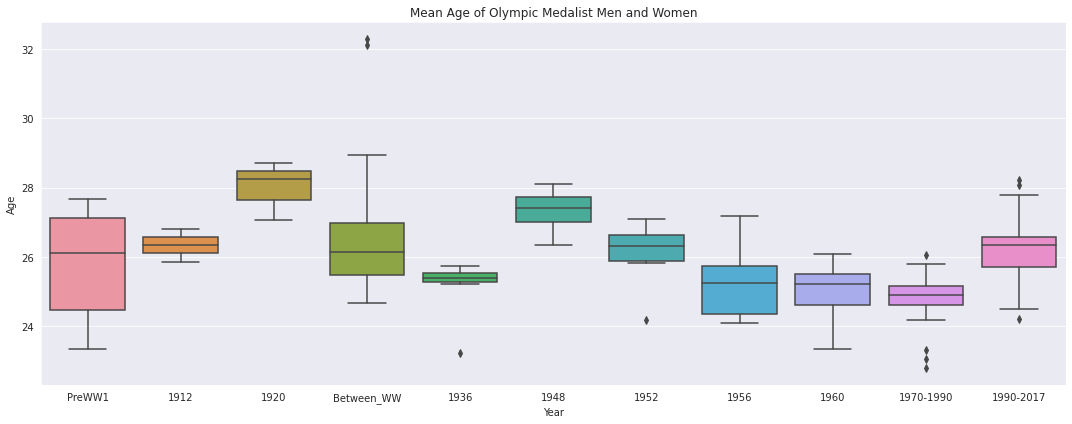

In [ ]:
################# Mean Age of Olympic Medalists affected by WW-1 and WW-2
#######################################################################################3plt.figure(figsize=(15, 6))
avg_medalist = participant_noNan.groupby(['Year', 'Season','Medal'])['Age'].mean().round(2)
ntest = avg_medalist.reset_index()
plt.figure(figsize=(15, 6))
lbl = ['PreWW1', '1912', '1920', 'Between_WW', '1936' , '1948', '1952', '1956','1960', '1970-1990', '1990-2017']
years_era =  pd.cut(ntest.Year, [1900,1911,1913,1921,1935,1940,1950 ,1953,1959,1970,1990, 2017], labels=lbl )
sns.boxplot(data=ntest, y='Age', x=years_era,).set(title='Mean Age of Olympic Medalist Men and Women');

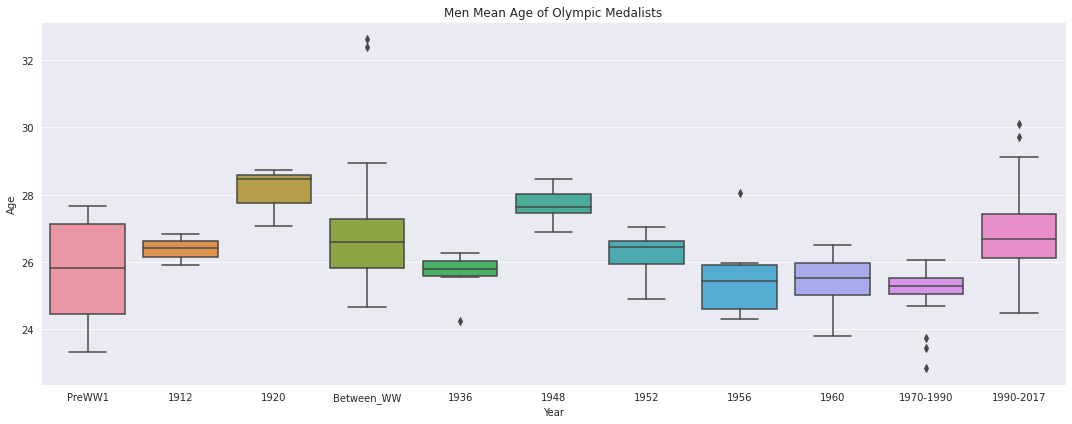

In [ ]:
################# Mean Age of Olympic Medalists affected by WW-1 and WW-2
#######################################################################################3plt.figure(figsize=(15, 6))
avg_medalist_m = participant_noNan[participant_noNan.Sex == 'M'].groupby(['Year', 'Season','Medal'])['Age'].mean().round(2)
ntest_m = avg_medalist_m.reset_index()
plt.figure(figsize=(15, 6))
plt.rcParams["figure.autolayout"] = True
lbl = ['PreWW1', '1912', '1920', 'Between_WW', '1936' , '1948', '1952', '1956','1960', '1970-1990', '1990-2017']
years_era =  pd.cut(ntest_m.Year, [1900,1911,1913,1921,1935,1940,1950 ,1953,1959,1970,1990, 2017], labels=lbl )
ntest_m
sns.boxplot(data= ntest_m, y='Age', x=years_era,).set(title='Men Mean Age of Olympic Medalists');


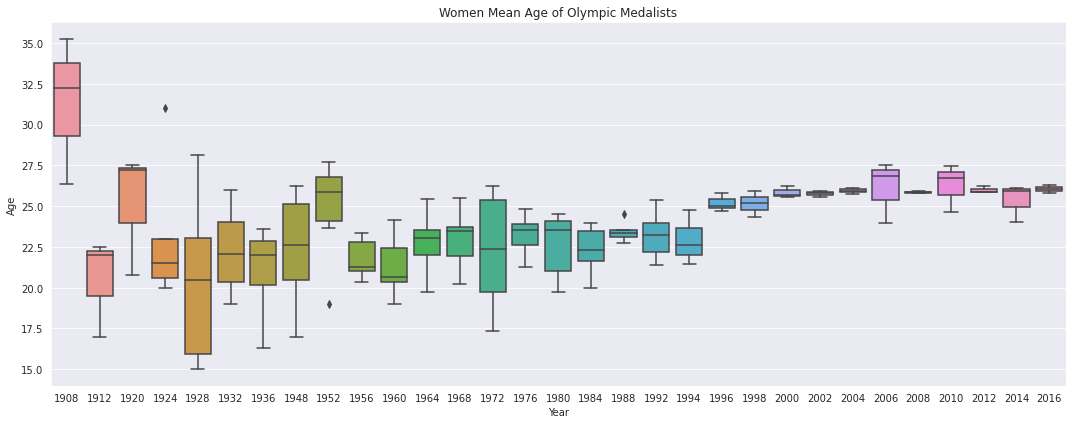

In [ ]:
avg_medalist_w = participant_noNan[(participant_noNan.Sex == 'F')& (participant_noNan.Year >= 1908)].groupby(['Year', 'Season','Medal'])['Age'].mean().round(2)
ntest_w = avg_medalist_w.reset_index()
plt.figure(figsize=(15, 6))
plt.rcParams["figure.autolayout"] = True
lbl = [ '1912', '1920', 'Between_WW', '1936' , '1948', '1952', '1956','1960', '1970-1990', '1990-2017']
years_era =  pd.cut(ntest_m.Year, [1911,1913,1921,1935,1940,1950 ,1953,1959,1970,1990, 2017], labels=lbl )
sns.boxplot(data= ntest_w, y='Age', x='Year',).set(title='Women Mean Age of Olympic Medalists');

Check physical characteristics of participants and medalists

In [ ]:
# #Checking how many Nan are in the Unique particpants df 
# print("Age Nans:     ", participant_noNan.Age.isna().sum())
# print("Height Nans:  ",participant_noNan.Height.isna().sum())
# print("Weight Nans:  ",participant_noNan.Weight.isna().sum(), '\n~~~~~~~~~~~~~~~~~~~\n')
# participant_noNan[participant_noNan.Age.isna() & participant_noNan.Weight.isna() & participant_noNan.Height.isna()].count()
# participant_noNan.shape

In [ ]:
olympics_df_noNan.shape

(262153, 18)

###Question number 2: Do we see diffrence is Average Physical Features ever, all Games between Olympic Paticipants?


In [ ]:
################################## Preparation physical features #############
#######################################################################################
part_physical = participant_noNan[['Age', 'Weight', 'Height', 'Medal']];
part_physical.Medal.fillna('noMedal', inplace = True) ;
medalT = ['noMedal','Gold', 'Silver', 'Bronze'];


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0.5, 1.0, 'avg_medalist Age Among Olympic Participants')

<Figure size 1080x432 with 0 Axes>

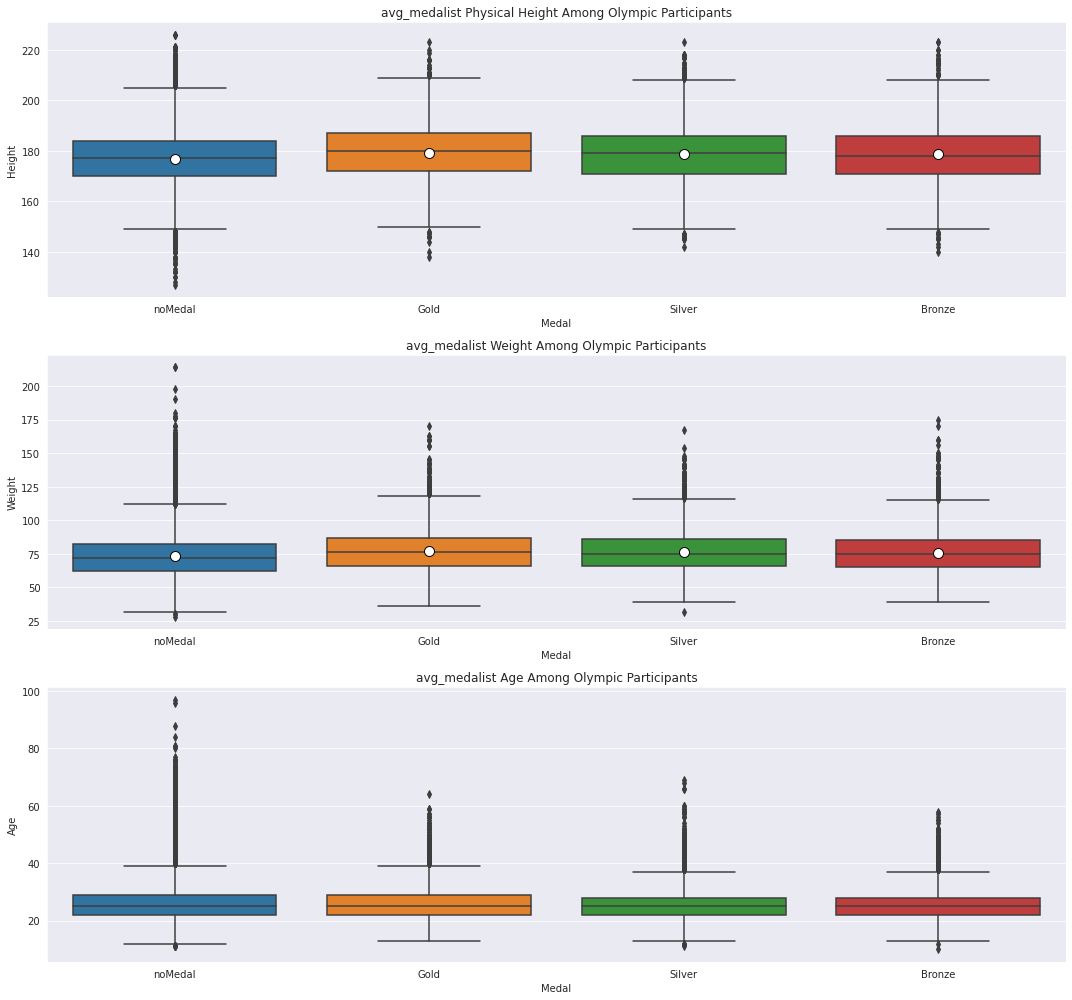

In [ ]:
############################ Olympic Paticipants avg physical features ever all Games ############
#######################################################################################
plt.figure(figsize=(15, 6))
fig, axes = plt.subplots(3, 1, figsize=(15, 14))
#fig.suptitle('avg_medalist Characteristics')
avg_medalist = participant_noNan[['Age', 'Weight', 'Height', 'Medal']];
avg_medalist.Medal.fillna('noMedal', inplace = True) ;
sns.boxplot(ax=axes[0], data = avg_medalist , x= 'Medal' , y='Height', order = medalT,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"} )#.set(title='avg_medalist Physical Height Among Olympic Participants');
axes[0].set_title('avg_medalist Physical Height Among Olympic Participants')
sns.boxplot(ax=axes[1], data = avg_medalist , x= 'Medal' , y='Weight', order = medalT,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"} )#.set(title='avg_medalist Weight Among Olympic Participants'); 
axes[1].set_title('avg_medalist Weight Among Olympic Participants')
sns.boxplot(ax=axes[2], data = avg_medalist , x= 'Medal' , y='Age', order = medalT )
axes[2].set_title('avg_medalist Age Among Olympic Participants')

############>>>>>>>>>>>>>>>>>>> Medalists are Taller and Heavier<<<<<<<<<<<<<<<<<###############

Coosing specific Sport to Analyze

<Figure size 1080x432 with 0 Axes>

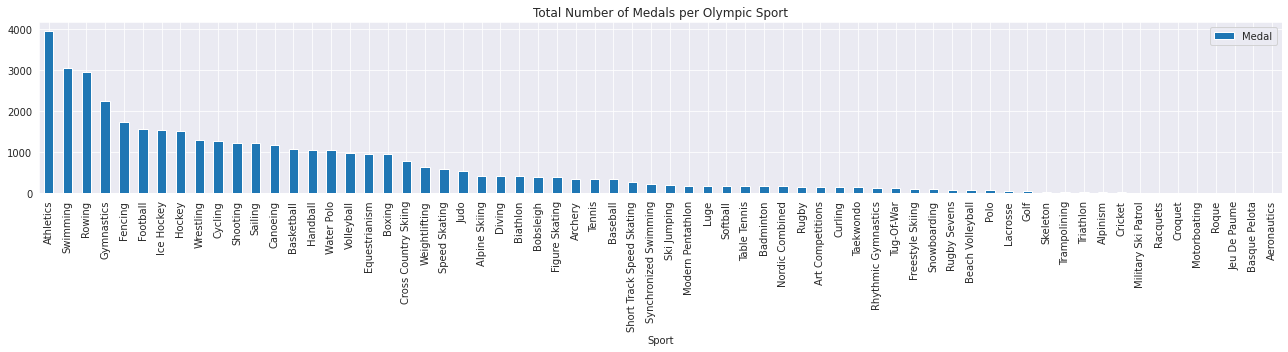

In [ ]:
##################### Deciding which sport to check ###################################
#######################################################################################
#which sport most medals each olympic
medals_per_sport = olympics_df_noNan.groupby('Sport')[ 'Medal'].count().sort_values(ascending = False).reset_index()
#medals_per_sport.plot()
medals_per_sport.tail(3)
plt.figure(figsize=(15, 6))
medals_per_sport.plot(kind = 'bar', x= 'Sport').set(title='Total Number of Medals per Olympic Sport');

############### We will check   Athletics, Gymnastics, Swimming, Rowing ###########################


Text(0.5, 1.0, 'Total medals Awarded for Swimming, Athletics, Gymnastics, Rowing in each Olympic Games ')

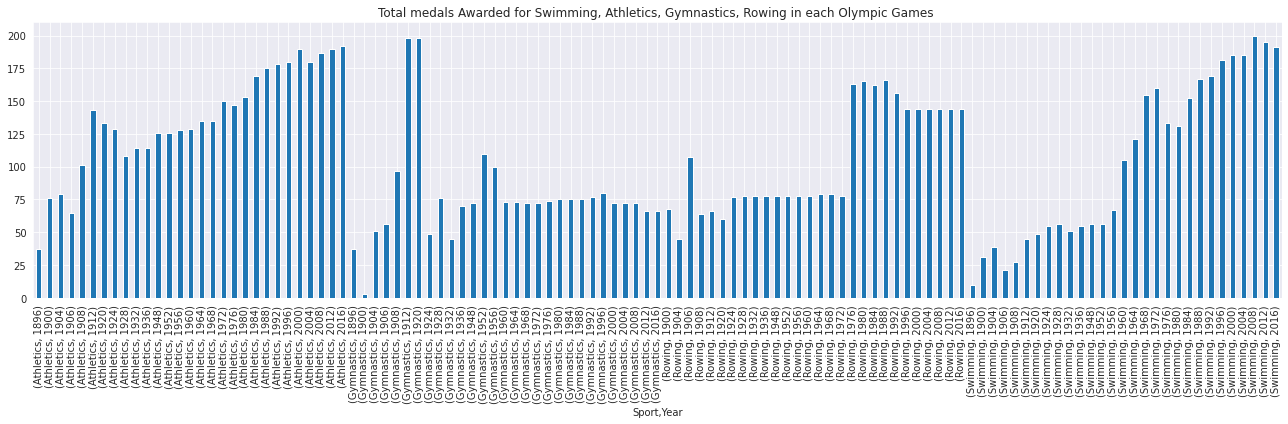

In [ ]:
plt.figure(figsize=(18, 6))

filter_list = ['Swimming','Athletics', 'Gymnastics', 'Rowing' ]
medals_per_sport_per_year = olympics_df_noNan[olympics_df_noNan.Sport.isin(filter_list) ].groupby(['Sport', 'Year'])[ 'Medal'].count()
medals_per_sport_per_year.plot(kind= 'bar', x = 'Sport', y= 'Medal' ).set_title('Total medals Awarded for Swimming, Athletics, Gymnastics, Rowing in each Olympic Games ')
#TODO different colour for each Sport

In [ ]:
# # olympics_df_noNan.sample(2)
# #print(plympics_df_noNan[(olympics_df_noNan.Sport== 'Swimming') & (olympics_df_noNan.Medal.notna()) ].head(2)
# #print('Swimming Gold Medalists Mean Age     : ',olympics_df_noNan[(olympics_df_noNan.Sport== 'Swimming') & (olympics_df_noNan.Medal== 'Gold') ].Age.mean())
# print('Swimming Gold Medalists Mean Age     : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Gold') ].Age.mean())
# print('Swimming Silver Medalists Mean Age   : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Silver') ].Age.mean())
# print('SwimmingBronze Medalists Mean Age   : ', participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Bronze') ].Age.mean())
# print('Swimming Medalists Mean Age         : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal.notna()) ].Age.mean())
# print('Swimmers Mean Age                   : ',participant_noNan[(participant_noNan.Sport== 'Swimming')  ].Age.mean())
# print('Swimmers Non-medal Mean Age         : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal.isna()) ].Age.mean())
# print('~~~'*10)
# print('Swimming Gold Medalists Mean Height    : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Gold') ].Height.mean())
# print('SwimmingSilver Medalists Mean Height   : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Silver') ].Height.mean())
# print('SwimmingBronze Medalists Mean Height   : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Bronze') ].Height.mean())
# print('Swimming Medalists Mean Height         : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal.notna()) ].Height.mean())
# print('Swimmers Mean Height                   : ',participant_noNan[(participant_noNan.Sport== 'Swimming')  ].Height.mean())
# print('Swimmers Non-medal Mean Height         : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal.isna()) ].Height.mean())
# print('~~~'*10)
# print('SwimmingGold Medalists Mean Weight     : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Gold') ].Weight.mean())
# print('SwimmingSilver Medalists Mean Weight   : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Silver') ].Weight.mean())
# print('SwimmingBronze Medalists Mean Weight   : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal== 'Bronze') ].Weight.mean())
# print('Swimming Medalists Mean Weight         : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal.notna()) ].Weight.mean())
# print('Swimmers Mean Weight                   : ',participant_noNan[(participant_noNan.Sport== 'Swimming')  ].Weight.mean())
# print('Swimmers Non-medal Mean Weight         : ',participant_noNan[(participant_noNan.Sport== 'Swimming') & (participant_noNan.Medal.isna()) ].Weight.mean())


Investigate Swimmers physical features

Text(0.5, 1.0, 'Swimmers Age Among Olympic Participants')

<Figure size 1080x432 with 0 Axes>

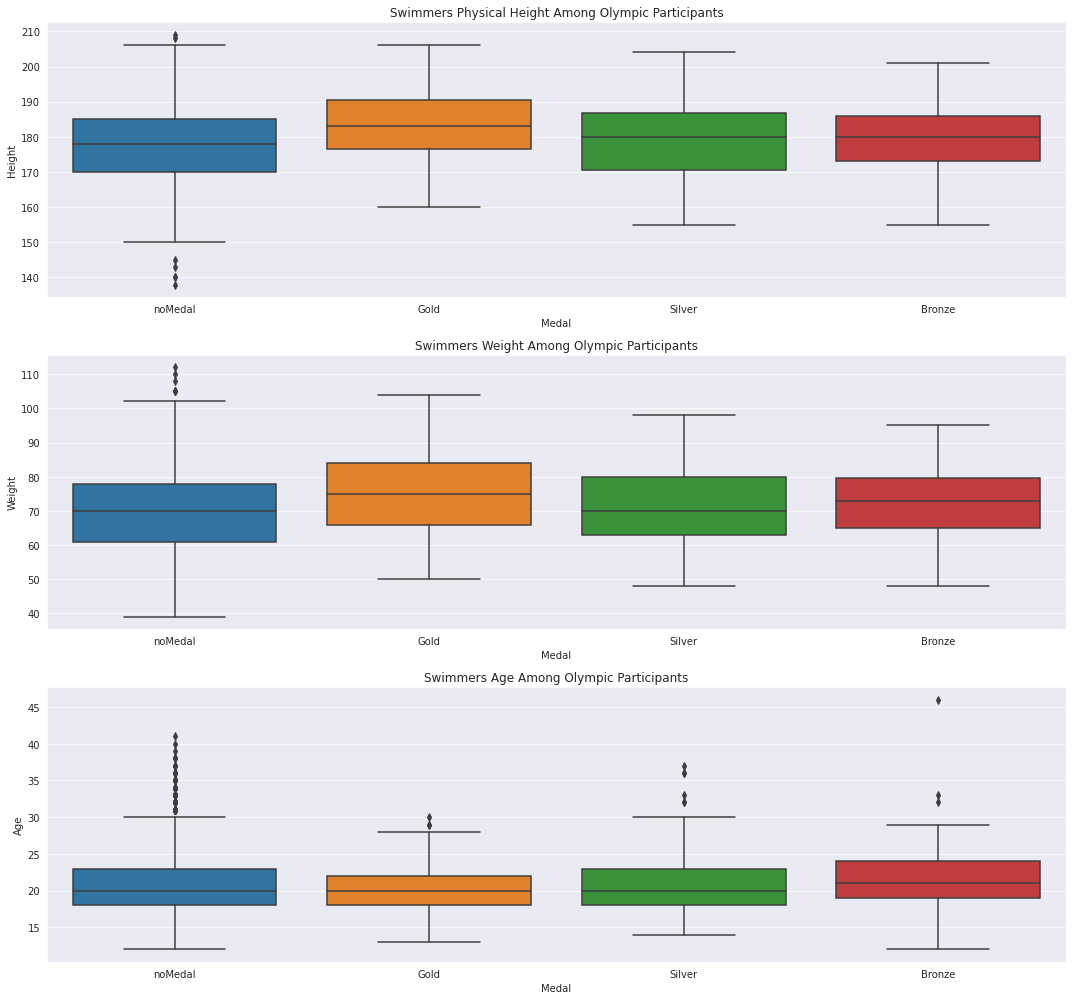

In [ ]:

####################    Swimmers physical features Medalists vs none medalsist  #################################
#################################################################################################################
plt.figure(figsize=(15, 6))
fig, axes = plt.subplots(3, 1, figsize=(15, 14))#, sharex =True)
#fig.suptitle('Swimmers Characteristics')
swimmers_part_physical = participant_noNan[participant_noNan.Sport == 'Swimming'][['Age', 'Weight', 'Height', 'Medal']];
swimmers_part_physical.Medal.fillna('noMedal', inplace = True) ;
##swimmers_part_physical.sample(3)
sns.boxplot(ax=axes[0], data = swimmers_part_physical , x= 'Medal' , y='Height', order = medalT )#
axes[0].set_title('Swimmers Physical Height Among Olympic Participants')
sns.boxplot(ax=axes[1], data = swimmers_part_physical , x= 'Medal' , y='Weight', order = medalT )#
axes[1].set_title('Swimmers Weight Among Olympic Participants')
sns.boxplot(ax=axes[2], data = swimmers_part_physical , x= 'Medal' , y='Age', order = medalT )#
axes[2].set_title('Swimmers Age Among Olympic Participants')

############>>>>>>>>>  Gold Medalist swimmers are Taller Heavier and in narrower Age range<<<<<<<<<<<<<<<<<<###############


Text(0.5, 1.0, 'Gymnastics Age Among Olympic Participants')

<Figure size 1080x432 with 0 Axes>

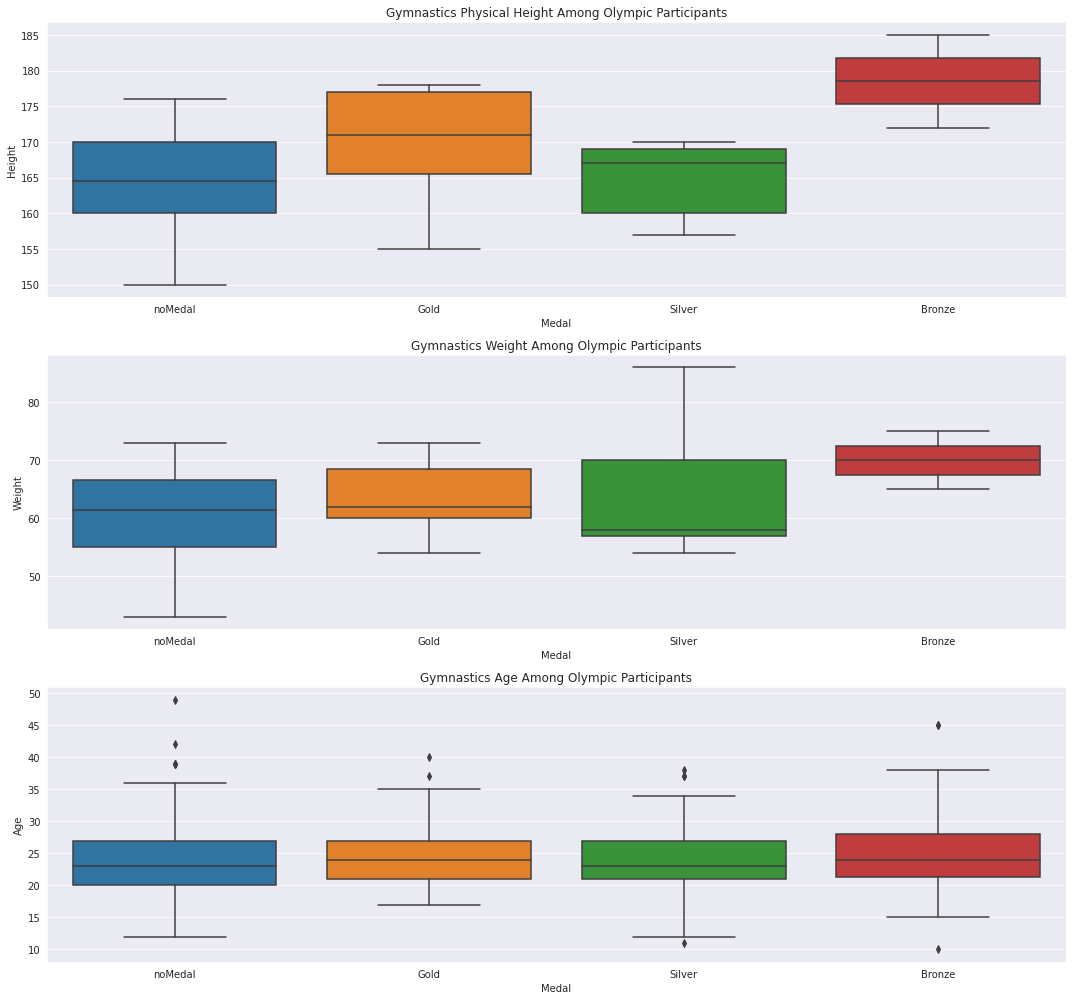

In [ ]:
####################    Gymnasts physical features Medalists vs none medalsist ########
#######################################################################################

plt.figure(figsize=(15, 6))
fig, axes = plt.subplots(3, 1, figsize=(15, 14))#, sharex =True)
#fig.suptitle('Swimmers Characteristics')
gymnastics_part_physical = participant_noNan[participant_noNan.Sport == 'Gymnastics'][['Age', 'Weight', 'Height', 'Medal']];
gymnastics_part_physical.Medal.fillna('noMedal', inplace = True) ;
##skijump_part_physical.sample(3)
sns.boxplot(ax=axes[0], data = gymnastics_part_physical , x= 'Medal' , y='Height', order = medalT )#
axes[0].set_title('Gymnastics Physical Height Among Olympic Participants')
sns.boxplot(ax=axes[1], data = gymnastics_part_physical , x= 'Medal' , y='Weight', order = medalT )#
axes[1].set_title('Gymnastics Weight Among Olympic Participants')
sns.boxplot(ax=axes[2], data = gymnastics_part_physical , x= 'Medal' , y='Age', order = medalT )# # 
axes[2].set_title('Gymnastics Age Among Olympic Participants')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>Age of gymnasts same, Gold Medalist taller (although Bronze more) Weight ~ 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~needs drill down to specifics that are not available in DS

Text(0.5, 1.0, 'Athletics Age Among Olympic Participants')

<Figure size 1080x432 with 0 Axes>

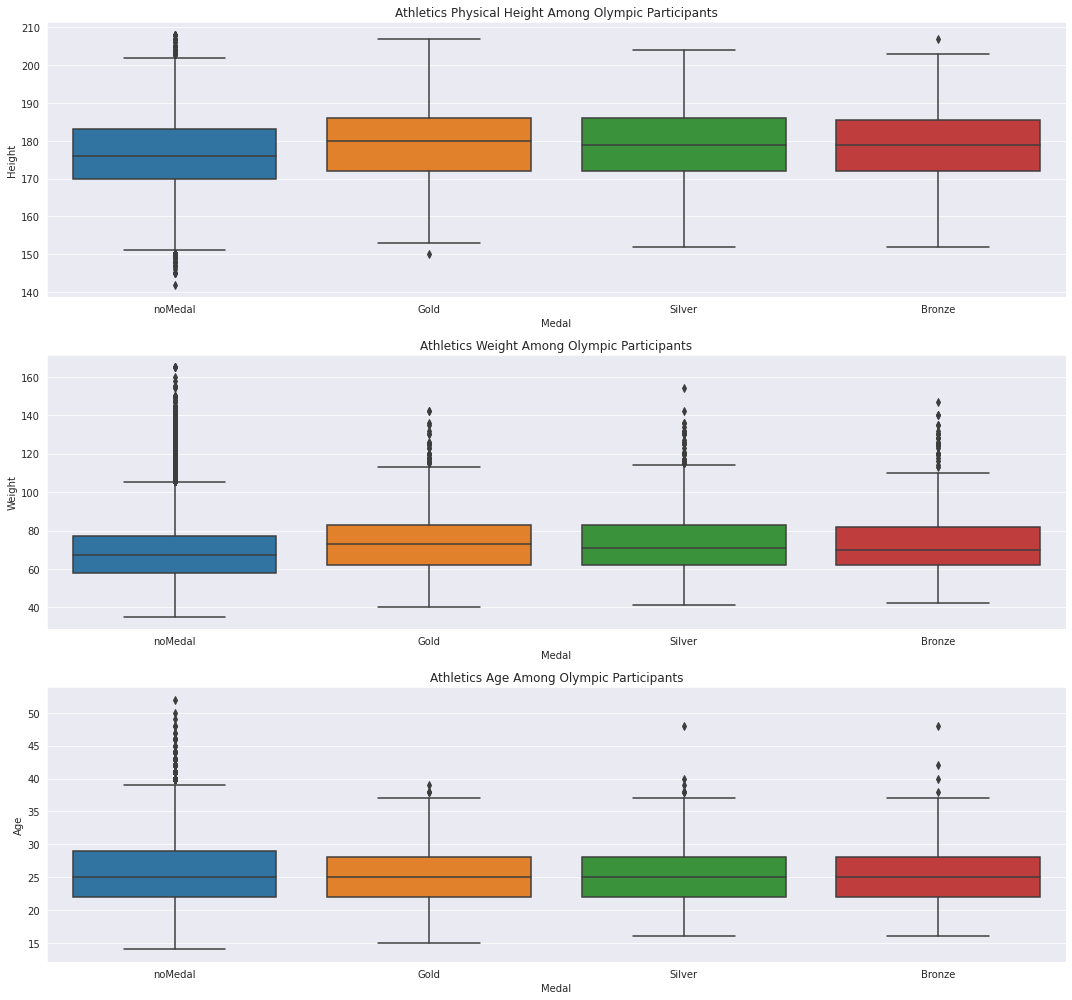

In [ ]:
####################    Athletes physical features Medalists vs none medalsist ########
#######################################################################################
plt.figure(figsize=(15, 6))
fig, axes = plt.subplots(3, 1, figsize=(15, 14)) #, sharex =True)
#fig.suptitle('Swimmers Characteristics')
Athletics_part_physical = participant_noNan[participant_noNan.Sport == 'Athletics'][['Age', 'Weight', 'Height', 'Medal']];
Athletics_part_physical.Medal.fillna('noMedal', inplace = True) ;
##Athleticss_part_physical.sample(3)
sns.boxplot(ax=axes[0], data = Athletics_part_physical , x= 'Medal' , y='Height', order = medalT )#
axes[0].set_title('Athletics Physical Height Among Olympic Participants')
sns.boxplot(ax=axes[1], data = Athletics_part_physical , x= 'Medal' , y='Weight', order = medalT )#
axes[1].set_title('Athletics Weight Among Olympic Participants')
sns.boxplot(ax=axes[2], data = Athletics_part_physical , x= 'Medal' , y='Age', order = medalT )# #
axes[2].set_title('Athletics Age Among Olympic Participants')

Text(0.5, 1.0, 'Rowers Age Among Olympic Participants')

<Figure size 1080x432 with 0 Axes>

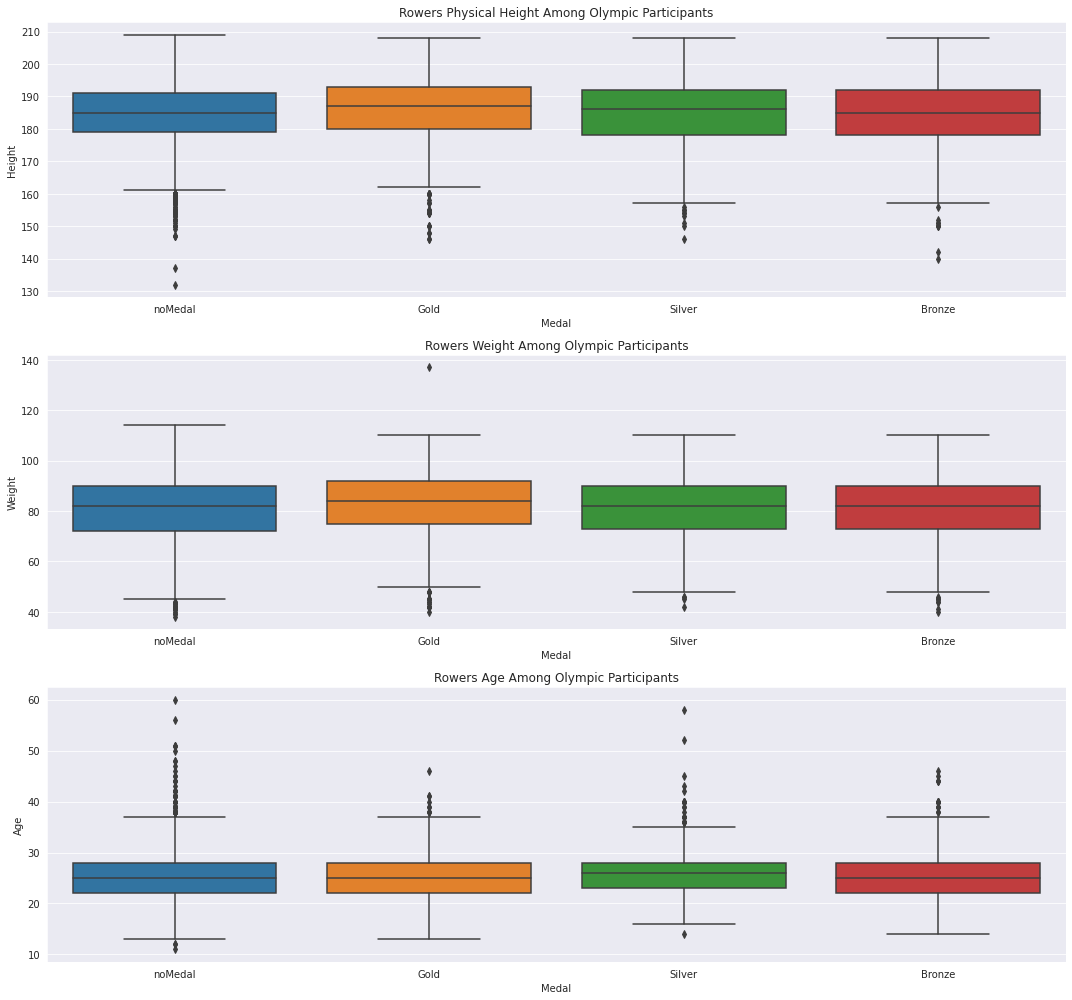

In [ ]:

#############################  Rowers physical features #############################
plt.figure(figsize=(15, 6))
fig, axes = plt.subplots(3, 1, figsize=(15, 14)) #, sharex =True)
#fig.suptitle('Swimmers Characteristics')
Rowing_part_physical = participant_noNan[participant_noNan.Sport == 'Rowing'][['Age', 'Weight', 'Height', 'Medal']];
Rowing_part_physical.Medal.fillna('noMedal', inplace = True) ;
##Athleticss_part_physical.sample(3)
sns.boxplot(ax=axes[0], data = Rowing_part_physical , x= 'Medal' , y='Height', order = medalT )#
axes[0].set_title('Rowers Physical Height Among Olympic Participants')
sns.boxplot(ax=axes[1], data = Rowing_part_physical , x= 'Medal' , y='Weight', order = medalT )#
axes[1].set_title('Rowers Weight Among Olympic Participants')
sns.boxplot(ax=axes[2], data = Rowing_part_physical , x= 'Medal' , y='Age', order = medalT )# # 
axes[2].set_title('Rowers Age Among Olympic Participants')

Investigate influence of hosting country on number of Medals it receives 
Summer Olympics

In [ ]:
####################            Total number of Medals each country gets in each Olympic Games ###########################
################################################ df: country_medals_total ################################################
temp1    = olympics_df_noNan[ (olympics_df_noNan.Season == 'Summer')].groupby(['Year', 'TeamCountry', 'HostCountry'])['Medal'].count()
#country_medals_total.reset_index.head(5)
country_medals_total = temp1.to_frame()
country_medals_total.reset_index(inplace = True)
country_medals_total.rename(columns = {'Medal':'CountryMedals'}, inplace = True)
country_medals_total.shape
country_medals_total.head(5)


,Year,TeamCountry,HostCountry,CountryMedals
0,1896,Australia,Greece,3
1,1896,Austria,Greece,5
2,1896,Denmark,Greece,6
3,1896,France,Greece,11
4,1896,Germany,Greece,32


In [ ]:
######################################Total number of Medals Awarded in each Olympic Games ####################################
################################################ df: olympic_year_total_medals ################################################

olympic_year_total_medals = olympics_df_noNan[ (olympics_df_noNan.Season == 'Summer')].groupby(['Year'])['Medal'].count()
temp = olympic_year_total_medals.reset_index()
type(temp)
temp.rename(columns = {'Medal':'TotalMedals'}, inplace = True)
medal_percentage_df= country_medals_total.merge(temp, on =['Year'], how = 'left')
medal_percentage_df
temp.sample(2)


,Year,TotalMedals
1,1900,593
15,1964,1029


###Question number 3: Does hosting the olypics games effect the percentage of medals ?

In [ ]:
#############b Add column of percent medals of total awarded medals for each Olympic games  ######################
####################################################################################################################
medal_percentage_df.insert( 5  , 'MedalPercentage', round(100*(medal_percentage_df.CountryMedals/medal_percentage_df.TotalMedals),2) )

In [ ]:
#Olympic Games Year 
np.sort(participant_noNan.Year.unique())

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

In [ ]:
#Checking for Berlin 1936
medal_percentage_df[medal_percentage_df.Year == 1936].reset_index()

,index,Year,TeamCountry,HostCountry,CountryMedals,TotalMedals,MedalPercentage
0,284,1936,Afghanistan,Germany,0,917,0.00
1,285,1936,Argentina,Germany,11,917,1.20
2,286,1936,Australia,Germany,1,917,0.11
3,287,1936,Austria,Germany,55,917,6.00
4,288,1936,Belgium,Germany,14,917,1.53
5,289,1936,Bermuda,Germany,0,917,0.00
6,290,1936,Boliva,Germany,0,917,0.00
7,291,1936,Brazil,Germany,0,917,0.00
8,292,1936,Bulgaria,Germany,0,917,0.00
9,293,1936,Canada,Germany,22,917,2.40


In [ ]:
#Checking for Rio De  Janero Brazil 2016
#medal_percentage[(medal_percentage.Year == 2016) & (medal_percentage.TeamCountry == 'Brazil') ]

In [ ]:
########################## Medals Host Country vs when not hosting  (prep) ##############
#########################################################################################
isLocalGames =(medal_percentage_df.TeamCountry== medal_percentage_df.HostCountry)

allhosts = medal_percentage_df.HostCountry.unique()
allhosts_df = medal_percentage_df[medal_percentage_df.TeamCountry.isin(allhosts) ]
allhosts_df
allhosts

array(['Greece', 'France', 'USA', 'United Kingdom', 'Sweden', 'Belgium',
       'Netherlands', 'Germany', 'Finland', 'Australia', 'Italy', 'Japan',
       'Mexico', 'West Germany', 'Canada', 'Soviet Union', 'South Korea',
       'Spain', 'China', 'Brazil'], dtype=object)

In [ ]:
allhosts_df.sample(3)

,Year,TeamCountry,HostCountry,CountryMedals,TotalMedals,MedalPercentage
153,1924,Brazil,France,0,832,0.00
1131,1984,Australia,USA,52,1476,3.52
86,1908,Netherlands,United Kingdom,16,831,1.93


Text(0.5, 1.0, 'Hosting Effect: Percentage of Total Medals when Hosting Compared To Not Hosting')

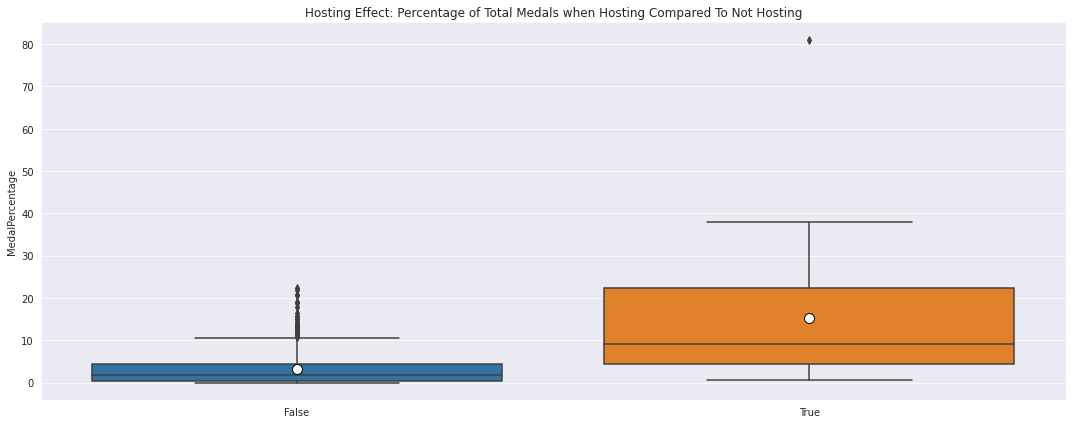

In [ ]:
########################## Medals Host Country vs when not hosting  #####################
#################################################################################
plt.figure(figsize=(15, 6))
sns.boxplot(data = allhosts_df , x = isLocalGames.astype(str), y = 'MedalPercentage',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Hosting Effect: Percentage of Total Medals when Hosting Compared To Not Hosting")

Check Hosting Effect for USA

,Year,TeamCountry,HostCountry,CountryMedals,TotalMedals,MedalPercentage
10,1896,USA,Greece,20,143,13.99
40,1900,USA,France,63,593,10.62
72,1906,USA,Greece,24,458,5.24
93,1908,USA,United Kingdom,65,831,7.82
121,1912,USA,Sweden,107,941,11.37
148,1920,USA,Belgium,194,1308,14.83
192,1924,USA,France,182,832,21.88
237,1928,USA,Netherlands,88,734,11.99
281,1932,USA,USA,189,647,29.21
331,1936,USA,Germany,96,917,10.47


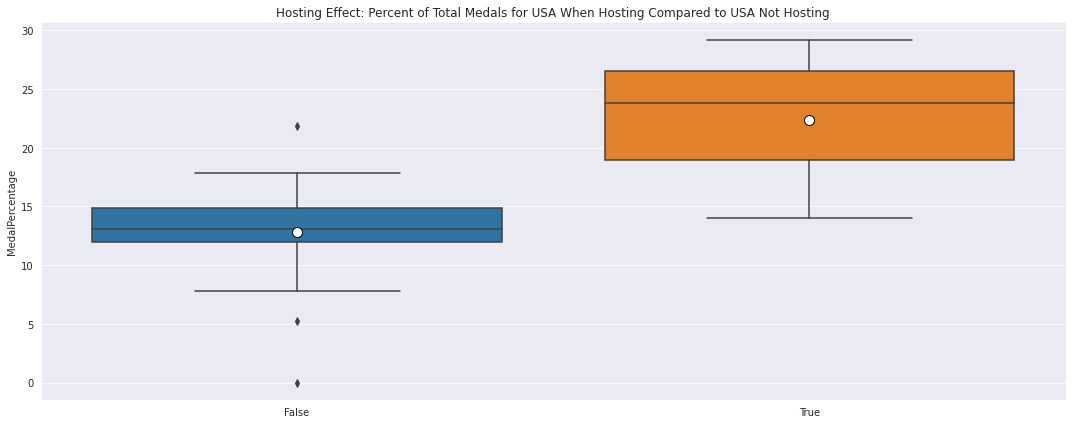

In [ ]:
plt.figure(figsize=(15, 6))
#us_df = allhosts_df[(medal_percentage.TeamCountry == 'USA') & (medal_percentage.Year != 1904)  ]
us_df = allhosts_df[(allhosts_df.TeamCountry == 'USA') & (allhosts_df.Year != 1904)  ]
sns.boxplot(data = us_df, x = isLocalGames.astype(str), y = 'MedalPercentage',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Hosting Effect: Percent of Total Medals for USA When Hosting Compared to USA Not Hosting")
us_df

Check Hosting Effect for Mexico

,Year,TeamCountry,HostCountry,CountryMedals,TotalMedals,MedalPercentage
29,1900,Mexico,France,3,593,0.51
175,1924,Mexico,France,0,832,0.00
220,1928,Mexico,Netherlands,0,734,0.00
266,1932,Mexico,USA,2,647,0.31
315,1936,Mexico,Germany,16,917,1.74
362,1948,Mexico,United Kingdom,9,852,1.06
425,1952,Mexico,Finland,1,897,0.11
509,1956,Mexico,Australia,2,893,0.22
593,1960,Mexico,Italy,1,911,0.11
684,1964,Mexico,Japan,1,1029,0.10


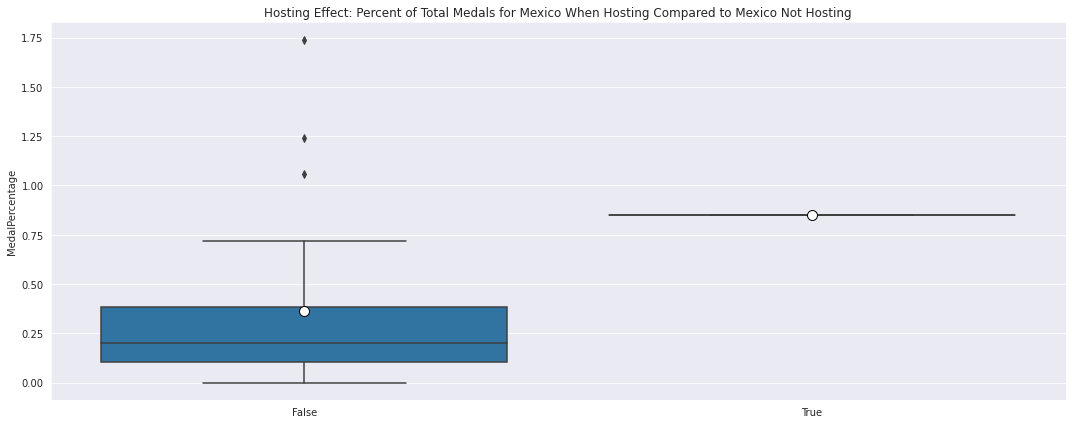

In [ ]:
plt.figure(figsize=(15, 6))
mex_df = allhosts_df[allhosts_df.TeamCountry == 'Mexico' ]
box_plot = sns.boxplot(data = mex_df, x = isLocalGames.astype(str), y = 'MedalPercentage',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Hosting Effect: Percent of Total Medals for Mexico When Hosting Compared to Mexico Not Hosting")
mex_df

Check Hosting Effect for Brazil

,Year,TeamCountry,HostCountry,CountryMedals,TotalMedals,MedalPercentage
15,1900,Brazil,France,0,593,0.00
124,1920,Brazil,Belgium,7,1308,0.54
153,1924,Brazil,France,0,832,0.00
244,1932,Brazil,USA,0,647,0.00
291,1936,Brazil,Germany,0,917,0.00
338,1948,Brazil,United Kingdom,10,852,1.17
395,1952,Brazil,Finland,3,897,0.33
466,1956,Brazil,Australia,1,893,0.11
467,1956,Brazil,Sweden,0,893,0.00
557,1960,Brazil,Italy,13,911,1.43


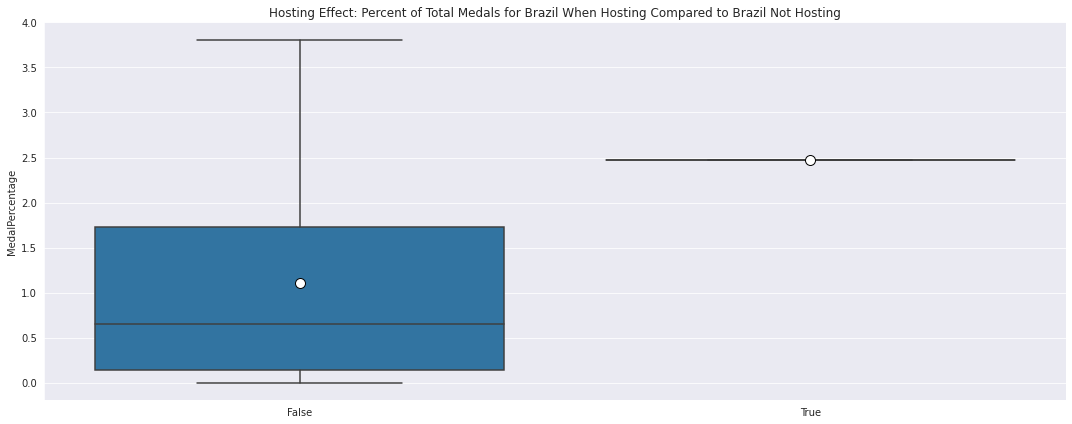

In [ ]:
plt.figure(figsize=(15, 6))
br_df = allhosts_df[allhosts_df.TeamCountry == 'Brazil' ]
sns.boxplot(data = br_df, x = isLocalGames.astype(str), y = 'MedalPercentage',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Hosting Effect: Percent of Total Medals for Brazil When Hosting Compared to Brazil Not Hosting")
br_df

Check Hosting Effect for Greece

,Year,TeamCountry,HostCountry,CountryMedals,TotalMedals,MedalPercentage
23,1900,Greece,France,0,593,0.00
47,1904,Greece,USA,2,486,0.41
63,1906,Greece,Greece,102,458,22.27
82,1908,Greece,United Kingdom,4,831,0.48
104,1912,Greece,Sweden,2,941,0.21
133,1920,Greece,Belgium,5,1308,0.38
165,1924,Greece,France,1,832,0.12
209,1928,Greece,Netherlands,0,734,0.00
256,1932,Greece,USA,0,647,0.00
305,1936,Greece,Germany,0,917,0.00


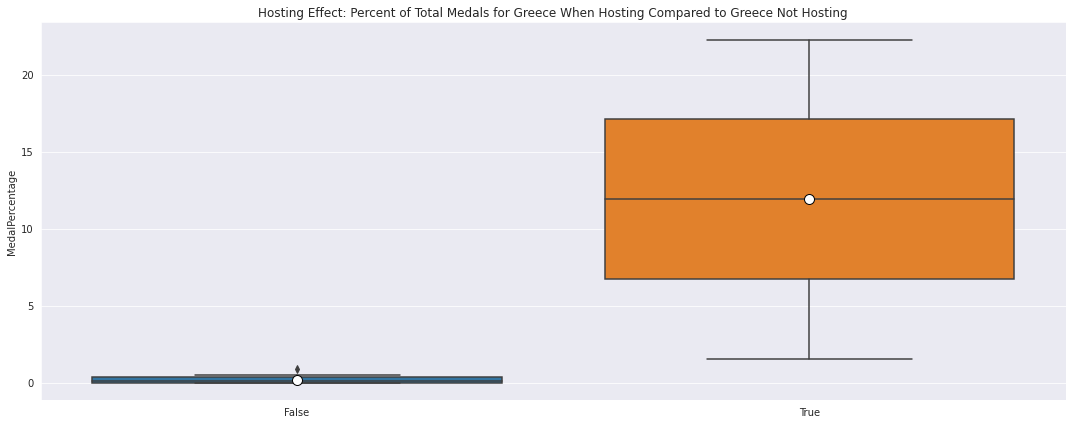

In [ ]:
plt.figure(figsize=(15, 6))
gr_df = allhosts_df[(allhosts_df.TeamCountry == 'Greece')  &(allhosts_df.Year !=1896)] 
sns.boxplot(data = gr_df, x = isLocalGames.astype(str), y = 'MedalPercentage',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}).set_title("Hosting Effect: Percent of Total Medals for Greece When Hosting Compared to Greece Not Hosting")
gr_df

########################################## THE END ##################################